<a href="https://colab.research.google.com/github/adexdams/ml-supervised-learning-time-series-regression/blob/main/04_Supervised_learning_time_series_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Continued**

In [2]:
#Preparing the tools by importing all the tools at once

#Regular libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

#Models from Sckit-Learn
from sklearn.ensemble import RandomForestRegressor

#Model Evaluations
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import r2_score

* Uploading the dataset for exploration and modelling.

In [3]:
df = pd.read_csv("bulldozer_train_tmp.csv")

<ipython-input-3-d47c670c07ff>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bulldozer_train_tmp.csv")


## **Exploring Data**
* Exploring the state of the data

In [4]:
df.shape

(412698, 57)

In [5]:
df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

## **Handling non-numeric data**

In [10]:
#Find columns that contain strings and objects in the table
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [16]:
#Converts strings found to categorical data
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [15]:
# To find object types
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [17]:
#Converts objects to categorical data
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

## **Handling Missing Data**

In [19]:
#Check for missing data
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Filling Numeric Values

In [20]:
#Separating numeric missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [21]:
#Check for numeric columns with null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [22]:
#Fill the missing numeric columns with the median number
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
          #Add a binary column to identify the data with missing value
          df[label+ "_is_missing"] = pd.isnull(content)
          #Fill the null values with the median value
          df[label] = content.fillna(content.median())

In [23]:
#Verify the filling action
df["auctioneerID"].isnull().sum()
df["MachineHoursCurrentMeter"].isnull().sum()

0

### Filling non-numeric value

In [26]:
df.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [27]:
#Turn categorical variables into numbers and fill the missing data
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column to verify missing values after replacement
        df[label+ "_is_missing"] = pd.isnull(content)
        #Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [30]:
df.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [31]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [34]:
df.shape

(412698, 103)

## **Creating ML Model**

<Axes: >

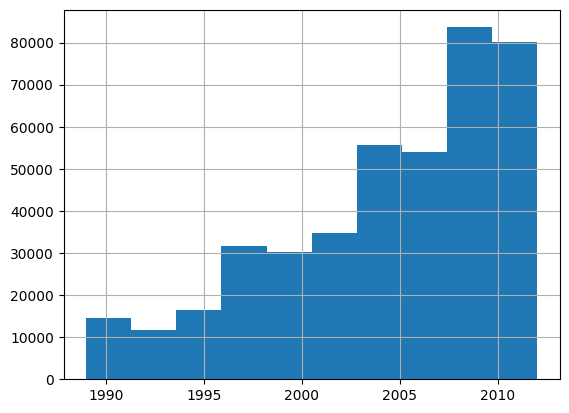

In [35]:
#Histogram chart for the sale year
df["saleYear"].hist()

In [42]:
#Split data into training and validation sets using the time column
df_val = df[df.saleYear == 2012]
df_train = df[df.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [56]:
#Split the data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [58]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In [64]:
#Creating an evaluation function (the Kaggle brief requested the use of RMSLE)

#defining the funciton to calculate root mean squarred log error between the prediction and true labels.
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#Create function to evaulate model on a few different levels
def show_scores (model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
          "valid MAE": rmsle(y_valid, val_preds),
          "Valid RMSLE": rmsle(y_valid, val_preds),
          "Training R^2": r2_score(y_train, train_preds),
          "Valid R^2": r2_score(y_valid, val_preds)
          }
    return scores

In [59]:
#Instantiating the model
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [60]:
  model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [65]:
show_scores (model)

{'Training MAE': 5561.2988092240585,
 'valid MAE': 0.29362638671089003,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## **Hyperparameter Tunning**

In [66]:
#Tunning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Setting up Different hyperparameter options
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

#Instantiate the RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

#Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [67]:
#Find the best model's hyperparameter
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [68]:
#Evaluate the RandomizedSearch model
#Scores on the model trained on ~10,000 samples
show_scores(rs_model)

{'Training MAE': 6050.315305384362,
 'valid MAE': 0.30183380525581377,
 'Valid RMSLE': 0.30183380525581377,
 'Training R^2': 0.8379168176147125,
 'Valid R^2': 0.8276880069903954}

## **Train with best params**

In [69]:
%%time

#Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=16,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

#Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 3min 56s, sys: 592 ms, total: 3min 57s
Wall time: 2min 34s


RandomForestRegressor(max_features=0.5, min_samples_split=16, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [70]:
#Scores for the ideal model trained on all the data
show_scores(ideal_model)

{'Training MAE': 3093.58578875136,
 'valid MAE': 0.2463675727872655,
 'Valid RMSLE': 0.2463675727872655,
 'Training R^2': 0.9549905937187679,
 'Valid R^2': 0.8809482621734378}

## **Make Predictions on Test Data**

In [88]:
df_test = pd.read_csv("Test.csv", low_memory=False, parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [90]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### **Preprocessing Test Dataset**

The aim is to make rhe test dataset in the same format as the training dataset that has been processed and cleaned.

In [91]:
#We will create a function to make all of that possible
def preprocess_data(df):
    #Breaking down the SaleDate column into sections
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear

    #Now to remove the original sale date
    df.drop("saledate", axis=1, inplace=True)

    #convert string to categorical data
    for label, content in df.items():
      if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

    #convert object to categorical data
    for label, content in df.items():
      if pd.api.types.is_object_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

    #Fill the missing numeric columns with the median number
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
              #Add a binary column to identify the data with missing value
              df[label+ "_is_missing"] = pd.isnull(content)
              #Fill the null values with the median value
              df[label] = content.fillna(content.median())

    #Turn categorical variables into numbers and fill the missing data
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #Add a binary column to verify missing values after replacement
            df[label+ "_is_missing"] = pd.isnull(content)
            #Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes+1

    return df

In [92]:
#Process test data with the function we created
df_test = preprocess_data(df_test)

In [93]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [94]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


The columns for the train data and the test data do not match. There is a missing column between them.

In [95]:
#Find the missing column by subtracting the columns from each other
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

This column is missing because the test data has no ''auctioneerID' missing values, hence the processor was unable tom to fill and create the last column.

In [101]:
#Manually adjust the dataset to have the 'auctioneerID_is_missing' column
df_test["auctioneerID_is_missing"] = False

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally the test data set has the same number of column as the training dataset, so we can predict with the model now.

In [103]:
column_index = X_train.columns.get_loc("auctioneerID_is_missing")

print(f"Column order number of 'auctioneerID_is_missing': {column_index}")

Column order number of 'auctioneerID_is_missing': 56


In [104]:
# Get the current index of the 'auctioneerID_is_missing' column
current_index = df_test.columns.get_loc("auctioneerID_is_missing")

# Get the list of column names
column_names = list(df_test.columns)

# Remove the 'auctioneerID_is_missing' column from its current location
column_names.pop(current_index)

# Insert the 'auctioneerID_is_missing' column at index 56
column_names.insert(56, "auctioneerID_is_missing")

# Recreate the DataFrame with the new column order
df_test = df_test[column_names]

In [105]:
#Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

In [106]:
test_preds

array([17363.70019873, 17882.0323023 , 53213.25164606, ...,
       12996.32416144, 16805.71142474, 24685.62415668])

In [109]:
#To make the predictions into the same format as Kaggle's rules
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17363.700199
1,1227844,17882.032302
2,1227847,53213.251646
3,1227848,76665.176336
4,1227863,55908.610046
...,...,...
12452,6643171,42597.008350
12453,6643173,11749.417734
12454,6643184,12996.324161
12455,6643186,16805.711425


In [110]:
#Export the prediction data to csv
df_preds.to_csv("test_predictions.csv", index=False)

## **Feature Importance**

Finding the features that were most important in the determining the target variable.

In [111]:
#Find the feature importance of our best model
ideal_model.feature_importances_

array([3.44438801e-02, 1.56053443e-02, 4.15874675e-02, 1.63418515e-03,
       3.12098380e-03, 2.13794616e-01, 3.08263036e-03, 1.03313272e-03,
       4.39904468e-02, 4.35534624e-02, 6.25015541e-02, 4.71634434e-03,
       1.40378371e-02, 1.61030027e-01, 4.47008475e-02, 5.51004205e-03,
       4.90297370e-03, 3.35354432e-03, 3.09594603e-03, 5.83707797e-02,
       4.90650878e-04, 9.22652396e-05, 7.42131461e-04, 1.82502440e-04,
       8.76085776e-04, 2.08750464e-05, 2.02568572e-03, 2.44590929e-03,
       2.46124526e-04, 2.49955725e-03, 3.97401886e-03, 2.17924313e-03,
       2.96865184e-03, 1.25391143e-03, 9.36929441e-04, 5.12110685e-03,
       8.92413005e-04, 1.31548319e-02, 1.60986237e-03, 2.19163075e-03,
       7.63278055e-04, 9.58689351e-04, 1.03859858e-03, 5.48495710e-04,
       5.75510599e-04, 3.18769087e-04, 5.45918422e-04, 2.39742552e-03,
       2.10418947e-03, 2.56830181e-04, 1.35845413e-04, 7.34298584e-02,
       3.62666323e-03, 5.18990451e-03, 2.64097671e-03, 9.21416319e-03,
      

In [118]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
              .sort_values("feature_importances", ascending=False)
              .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

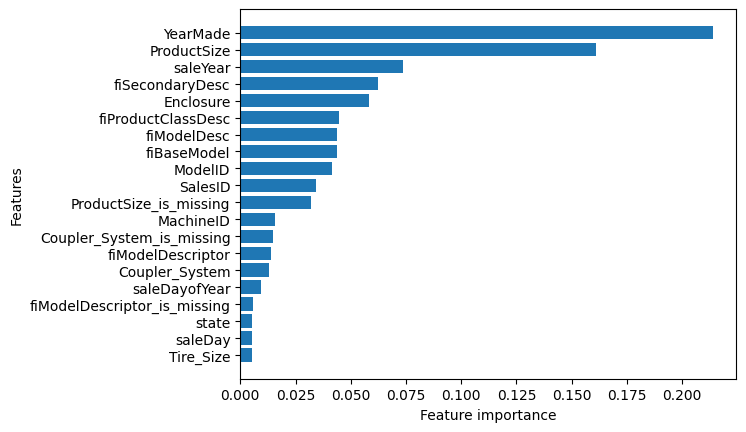

In [119]:
plot_features(X_train.columns, ideal_model.feature_importances_)